In [47]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial as P
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
#import statsmodels.api as sm

import re

In [106]:
#sb.color_palette("crest", as_cmap=True)

In [3]:
df = pd.read_csv('../data/mergedData.csv')
df.set_index('Timestamp', inplace=True)
df.index = pd.to_datetime(df.index)

In [107]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    colNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{colNames[i]}')
    plt.show()

# Current plots

## Heatmaps

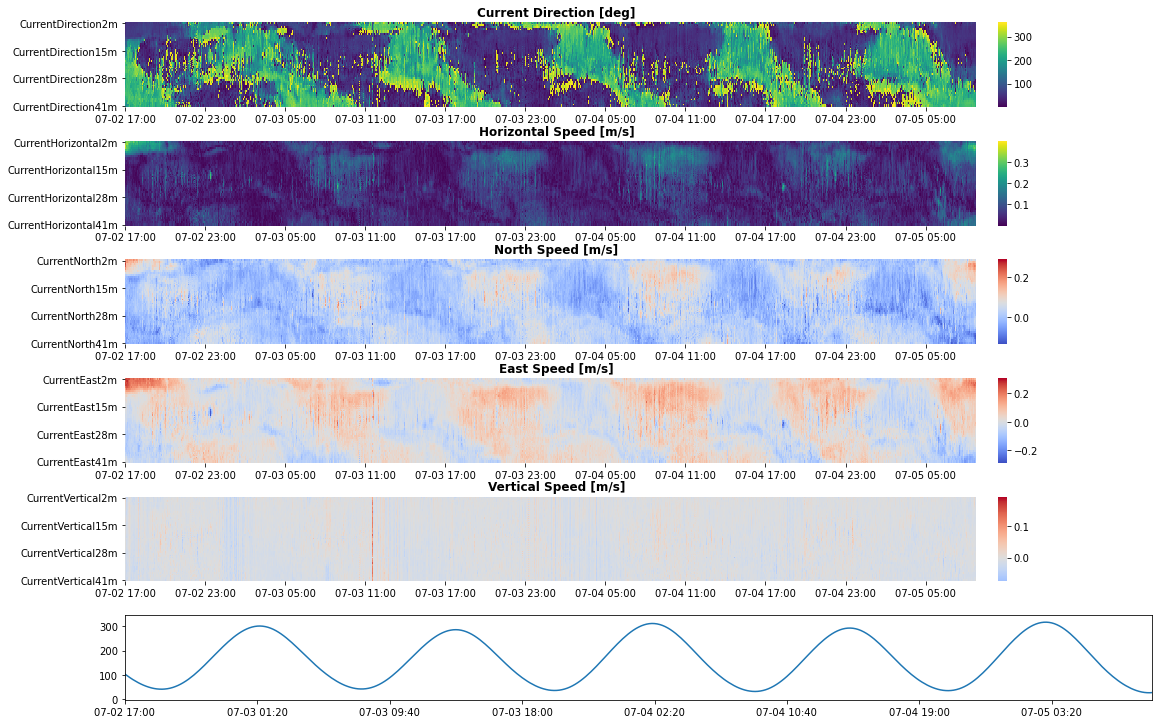

In [179]:
# TODO: Fix axis labels and ticks

fig, ax = plt.subplots(6,1,figsize=(15,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

#gs = gridspec.GridSpec(6,5)

ax[0].set_title('Current Direction [deg]', fontweight='bold')
ax[1].set_title('Horizontal Speed [m/s]', fontweight='bold')
ax[2].set_title('North Speed [m/s]', fontweight='bold')
ax[3].set_title('East Speed [m/s]', fontweight='bold')
ax[4].set_title('Vertical Speed [m/s]', fontweight='bold')

cutFrame = df[pd.Timestamp('2019-07-02 17:00:00'):]
cutFrame.index = cutFrame.index.strftime('%m-%d %H:%M')
currentDir = cutFrame.loc[:,'CurrentDirection2m':'CurrentDirection41m'].transpose()
currentHori = cutFrame.loc[:,'CurrentHorizontal2m':'CurrentHorizontal41m'].transpose()
currentVert = cutFrame.loc[:,'CurrentVertical2m':'CurrentVertical41m'].transpose()
currentNorth = cutFrame.loc[:,'CurrentNorth2m':'CurrentNorth41m'].transpose()
currentEast = cutFrame.loc[:,'CurrentEast2m':'CurrentEast41m'].transpose()
tideLvl = cutFrame.loc[:,'TideLevel'].dropna().transpose()

sb.heatmap(currentDir, xticklabels=360, yticklabels = 13, cmap='viridis', ax=ax[0], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentHori, xticklabels=360, yticklabels = 13, cmap='viridis', ax=ax[1], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentNorth, xticklabels=360, yticklabels = 13, cmap='coolwarm', ax=ax[2], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentEast, xticklabels=360, yticklabels = 13, cmap='coolwarm', ax=ax[3], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentVert, xticklabels=360, yticklabels = 13, cmap='coolwarm', ax=ax[4], center = 0.00, cbar_kws=dict(pad=0.01, aspect=10))

# TODO fix tide plot
tideLvl.plot(ax=ax[5])
ax[5].margins(0.0, 0.1)

for axis in ax:
    axis.xaxis.label.set_visible(False)
    #axis.set_xticklabels(df.index.astype('string')[2::360])
    #axis.yaxis.set_label('Depth')

C:\Users\moesk\anaconda3\envs\oxygenModel\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


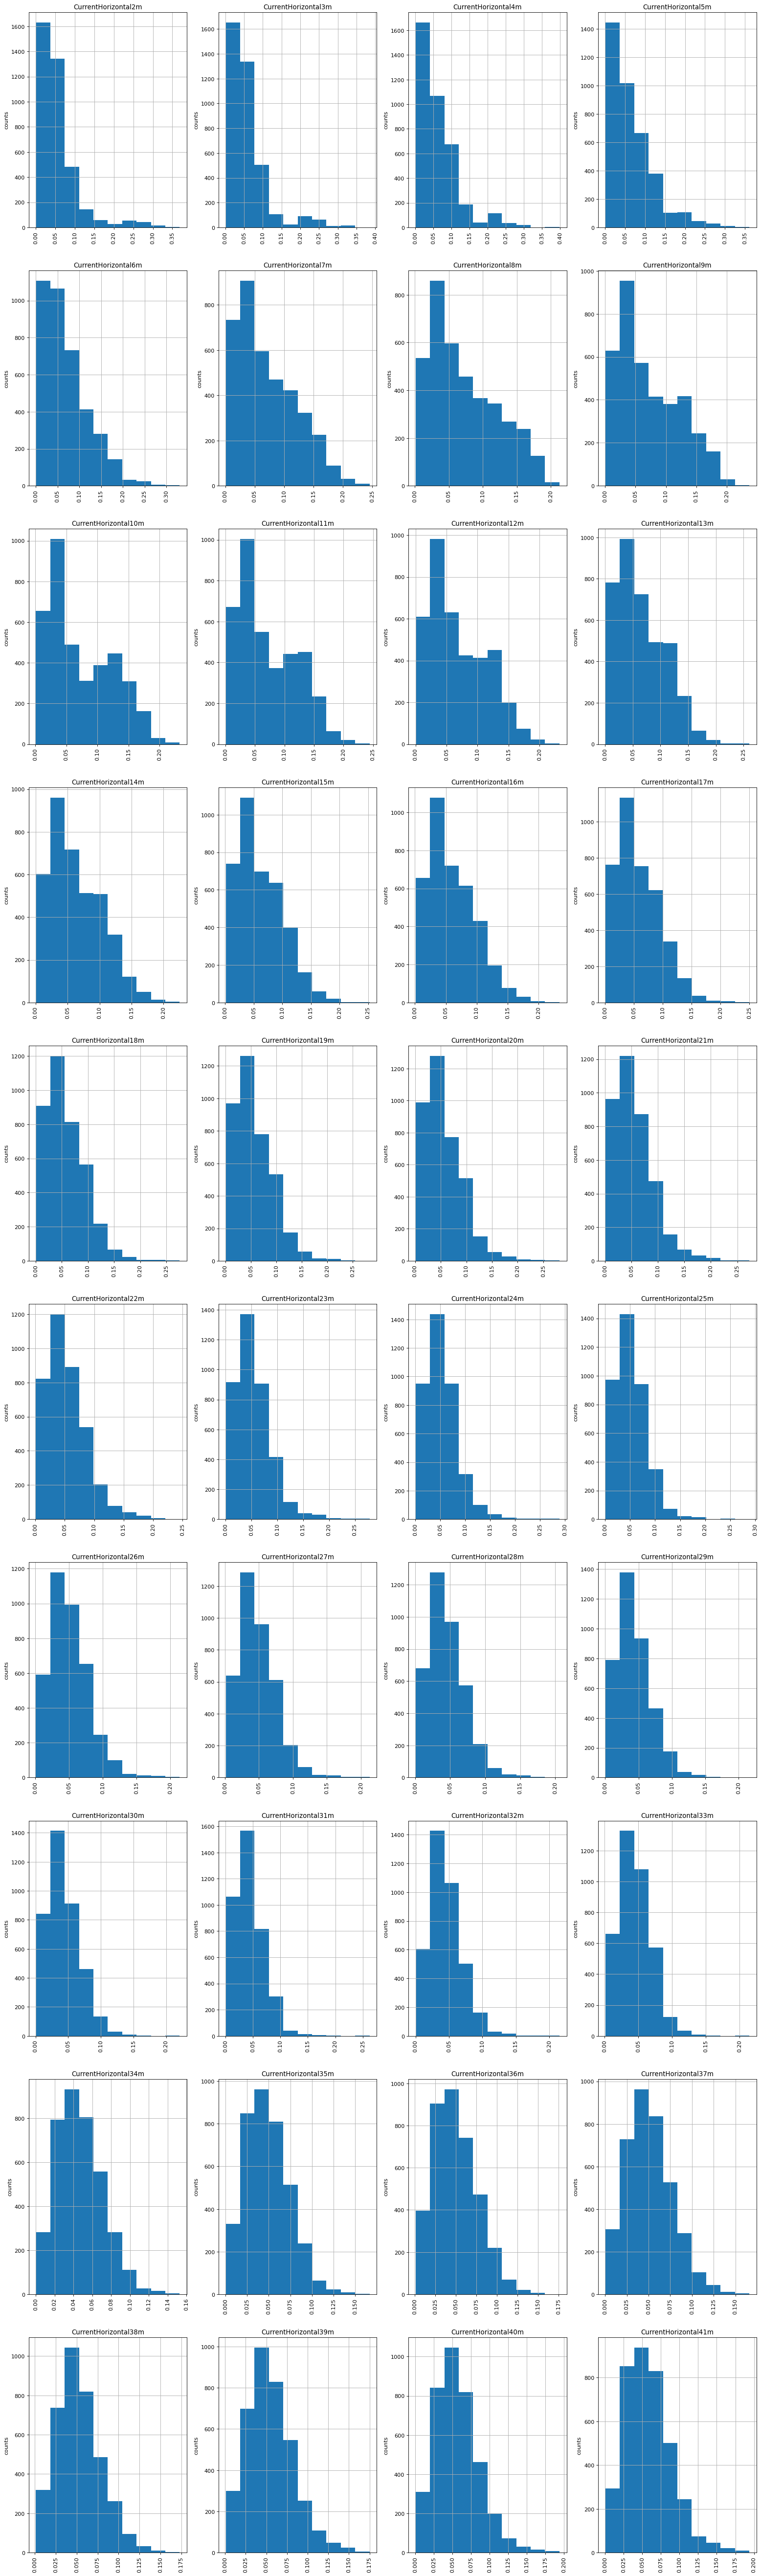

In [108]:
plotPerColumnDistribution(cutFrame.loc[:,'CurrentHorizontal2m':'CurrentHorizontal41m'], 40, 4)

## Center oxygen measurements

### Temperature

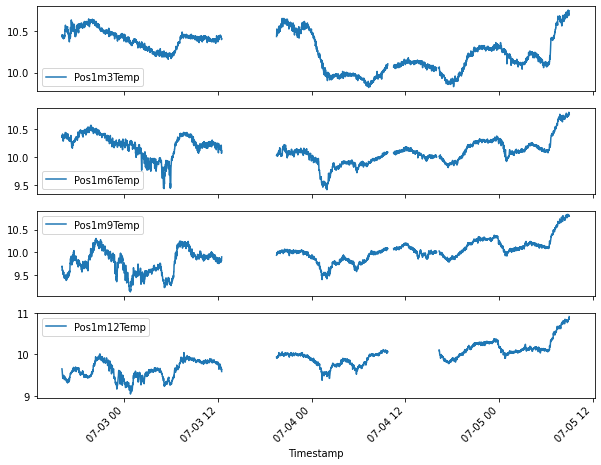

In [5]:
fig, ax = plt.subplots(4,1)
for key, i in enumerate(range(3,13,3)):
    df.loc[:,'Pos1m' + str(i) + 'Temp'].plot(ax=ax[key], rot = 45, legend=True, figsize=(10,8), sharex=True)

### Mean plot

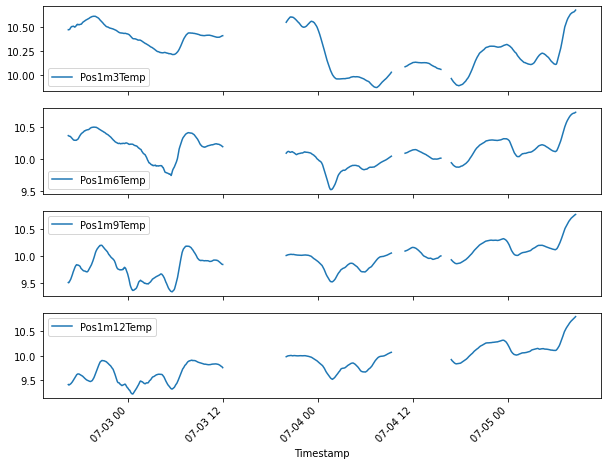

In [6]:
fig, ax = plt.subplots(4,1)
for key, i in enumerate(range(3,13,3)):
    df.loc[:,'Pos1m' + str(i) + 'Temp'].rolling(window = 60, center=True).mean().plot(ax=ax[key], rot = 45, legend=True, figsize=(10,8), sharex=True)
    # .resample('H').mean()

### Remove trend with differencing

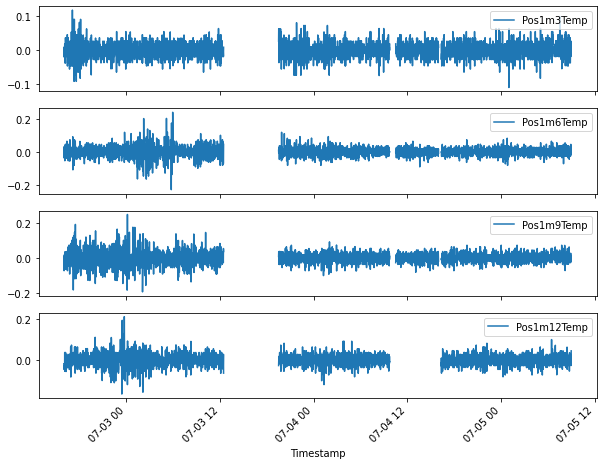

In [7]:
fig, ax = plt.subplots(4,1)
for key, i in enumerate(range(3,13,3)):
    df.loc[:,'Pos1m' + str(i) + 'Temp'].diff().plot(ax=ax[key], rot = 45, legend=True, figsize=(10,8), sharex=True)

## Temperature measurements

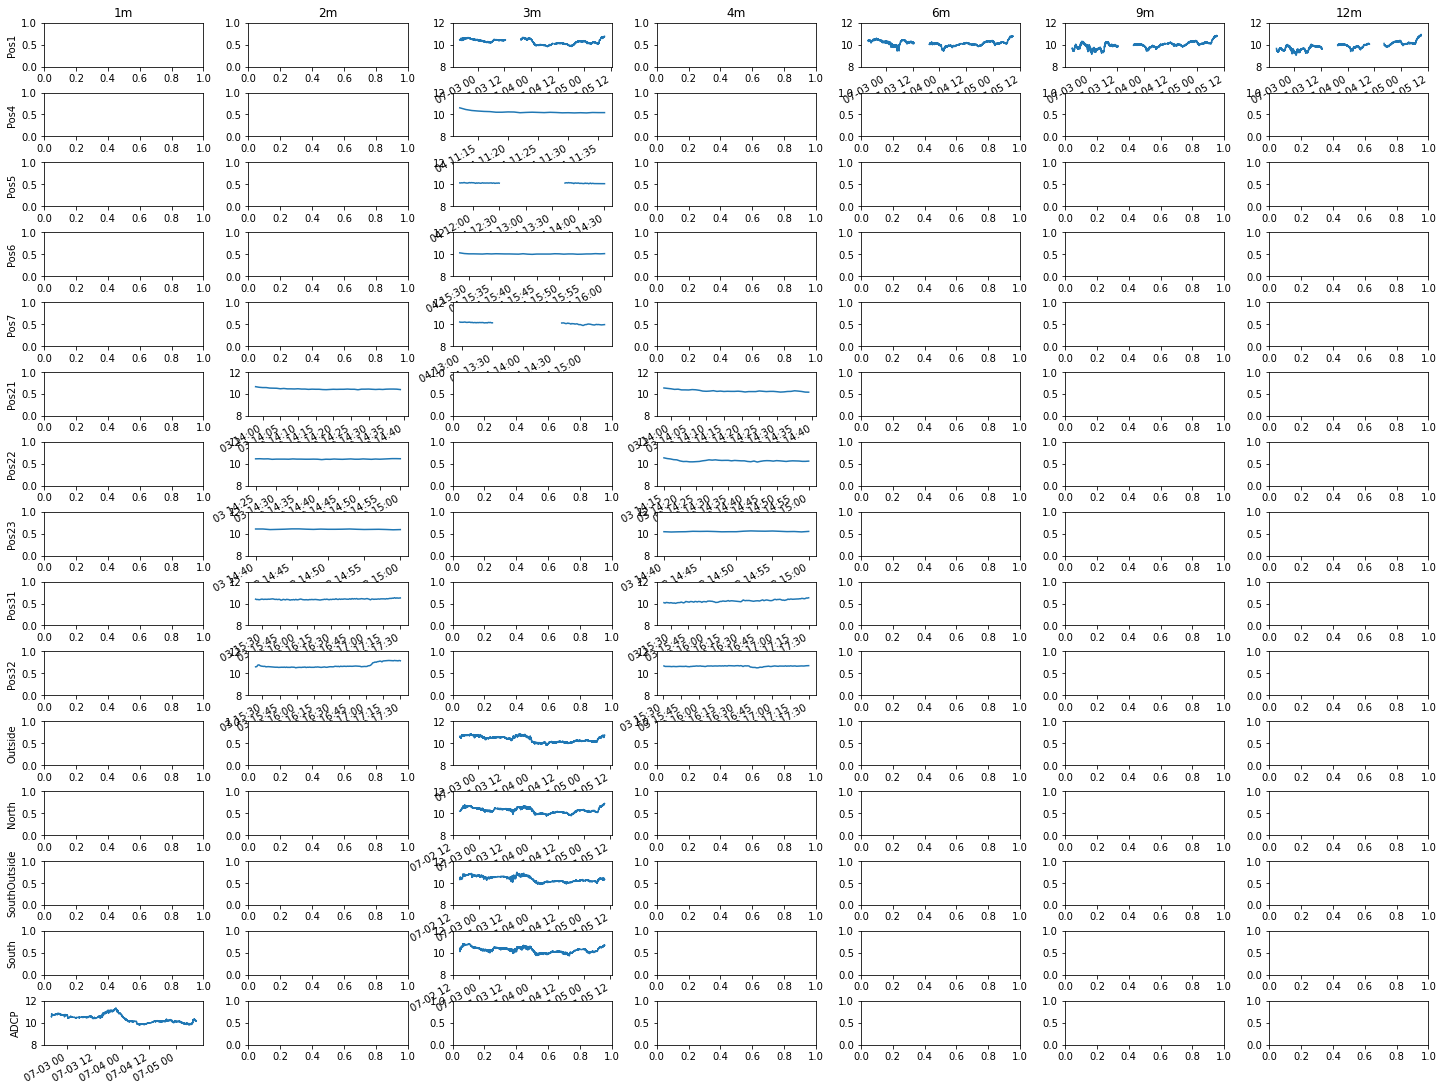

In [8]:
tempColumns = [col for col in df.columns if 'Temp' in col]
positions = []
depths = [1, 2, 3, 4, 6, 9, 12]

fig, axes = plt.subplots(15,len(depths), figsize=(20,18))
fig.tight_layout()

for key, col in enumerate(tempColumns):
    depth = int(re.search('m\d+', col).group()[1:])  # Get sensor depth
    pos = col[0:re.search('m\d+', col).start()]      # Get sensor position

    if pos not in positions:   # Slow, switch to dict later maybe
        positions.append(pos)

    df.loc[:,col].plot(ax=axes[positions.index(pos), depths.index(depth)], ylim=(8,12))


for key, ax in enumerate(axes[0]):
    ax.set_title(str(depths[key]) + 'm')
    #plt.xticks(rotation=45)
    
for key, ax in enumerate(axes[:,0]):
    ax.set_ylabel(positions[key])
    ax.xaxis.label.set_visible(False)

# TODO: Remove Pos 22 temp measurements?

array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>], dtype=object)

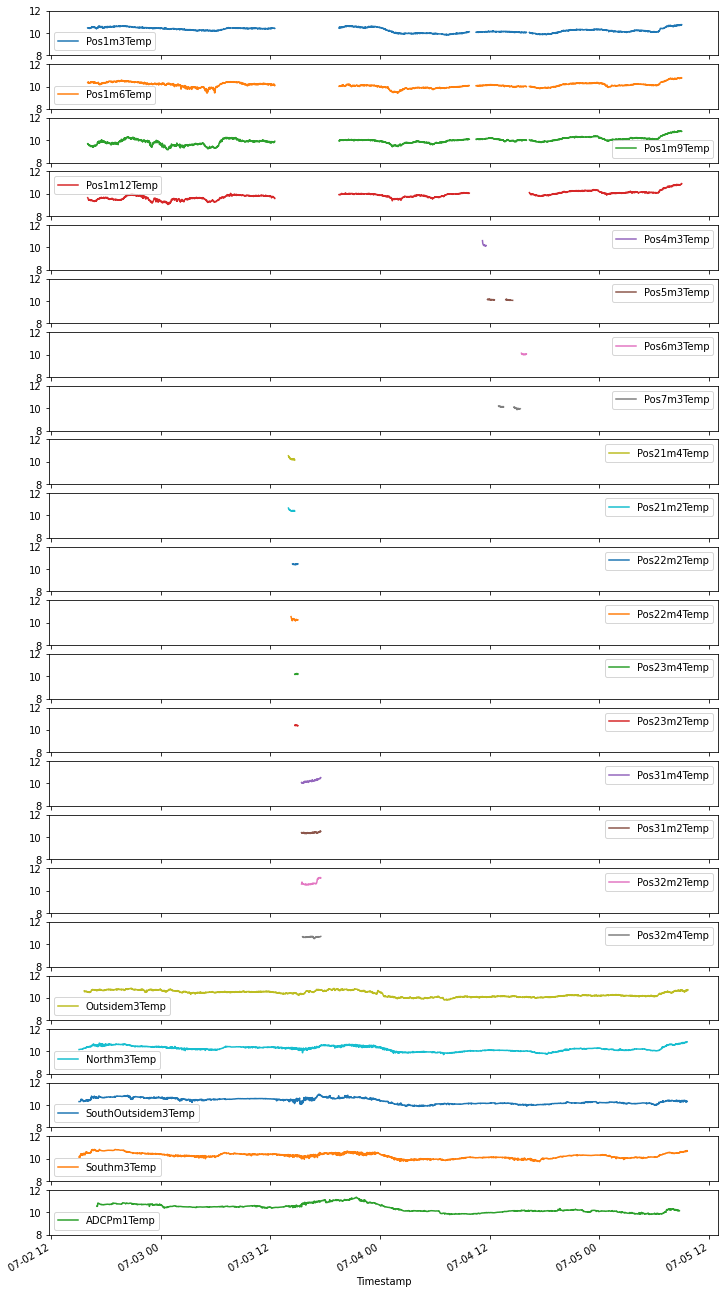

In [9]:
df.loc[:,tempColumns].plot(subplots=True, figsize=(12,25), ylim=(8,12))

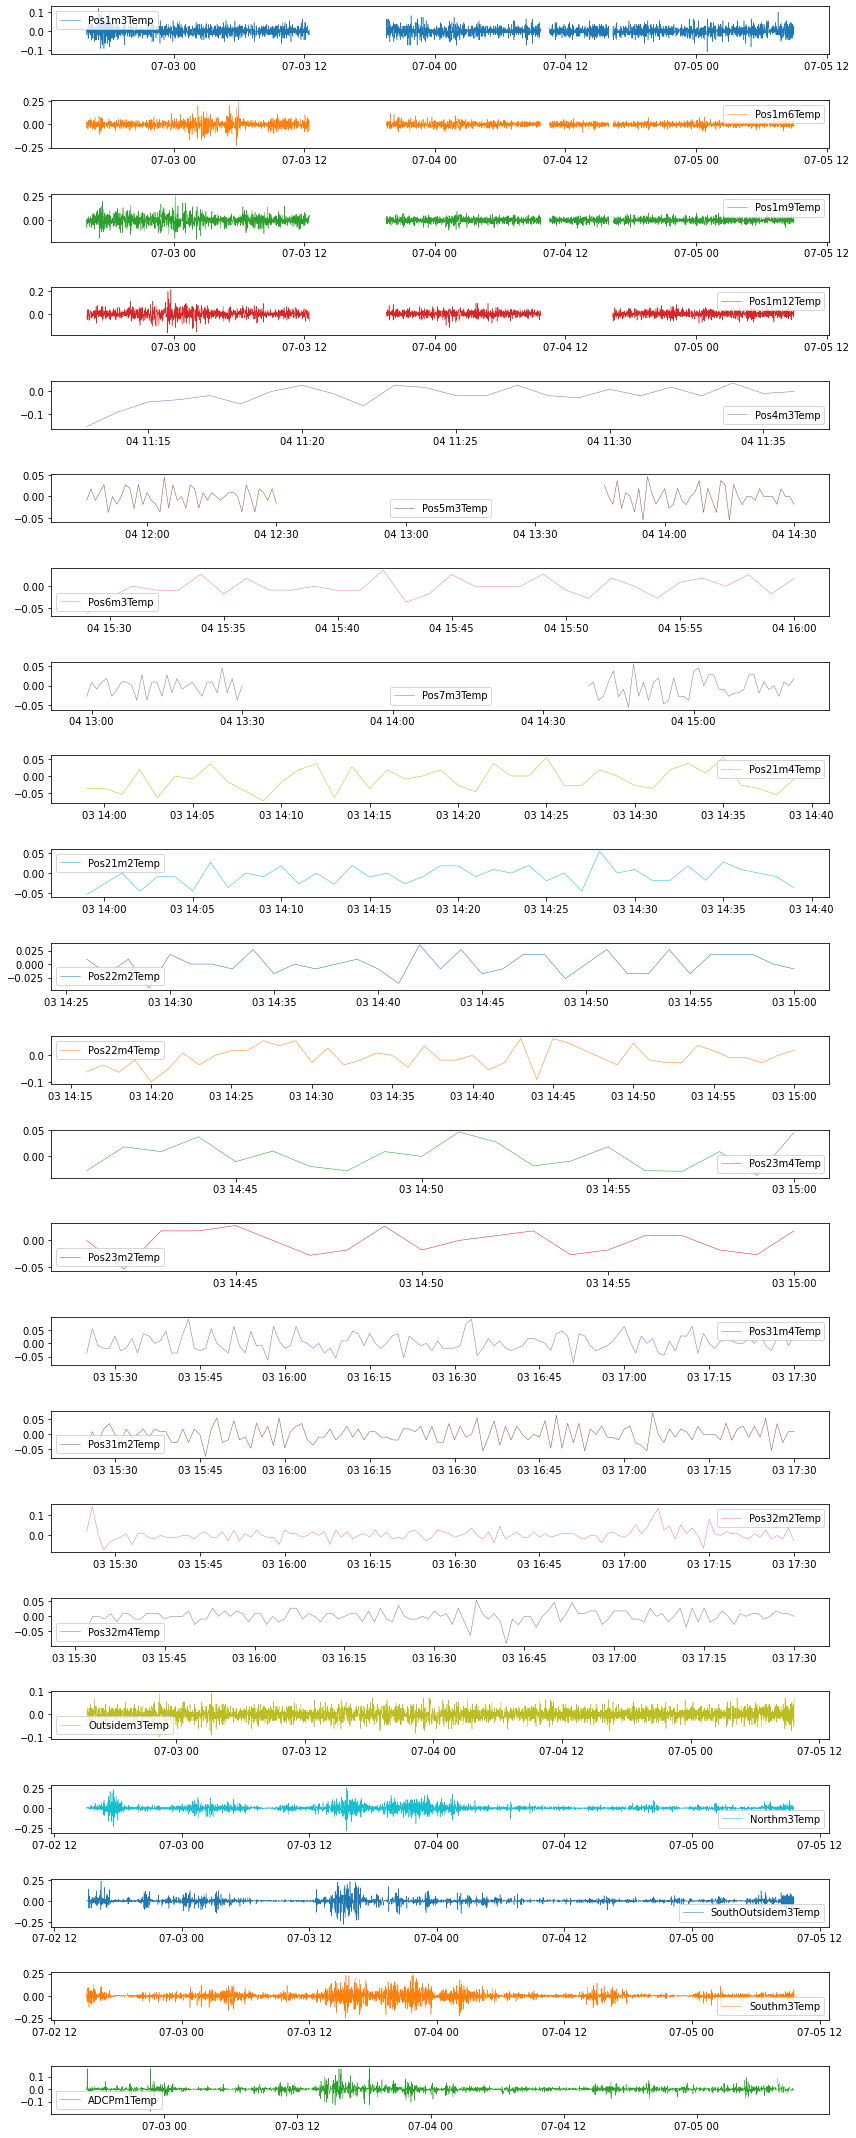

In [10]:
ax = df.loc[:,tempColumns].diff().plot(subplots=True, figsize=(12,30), linewidth=0.5, sharex=False)
plt.tight_layout()
for axis in ax:
    axis.xaxis.label.set_visible(False)

## Note on Temperature measurement intervals

Moving of sensors cause the temperature to be too high at the start of measurements. This is a problem for positions that were only measured at for a very short time. See position 22 for example.

# DO measurements

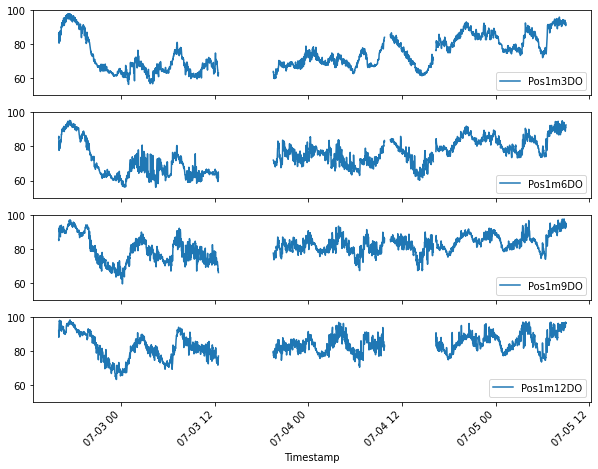

In [11]:
fig, ax = plt.subplots(4,1)
for key, i in enumerate(range(3,13,3)):
    #df.loc[:,col].plot(ax=axes[positions.index(pos), depths.index(depth)], ylim=(50, 110))
    df.loc[:,'Pos1m' + str(i) + 'DO'].plot(ax=ax[key], rot = 45, legend=True, figsize=(10,8), sharex=True, sharey=True, ylim=(50,100))

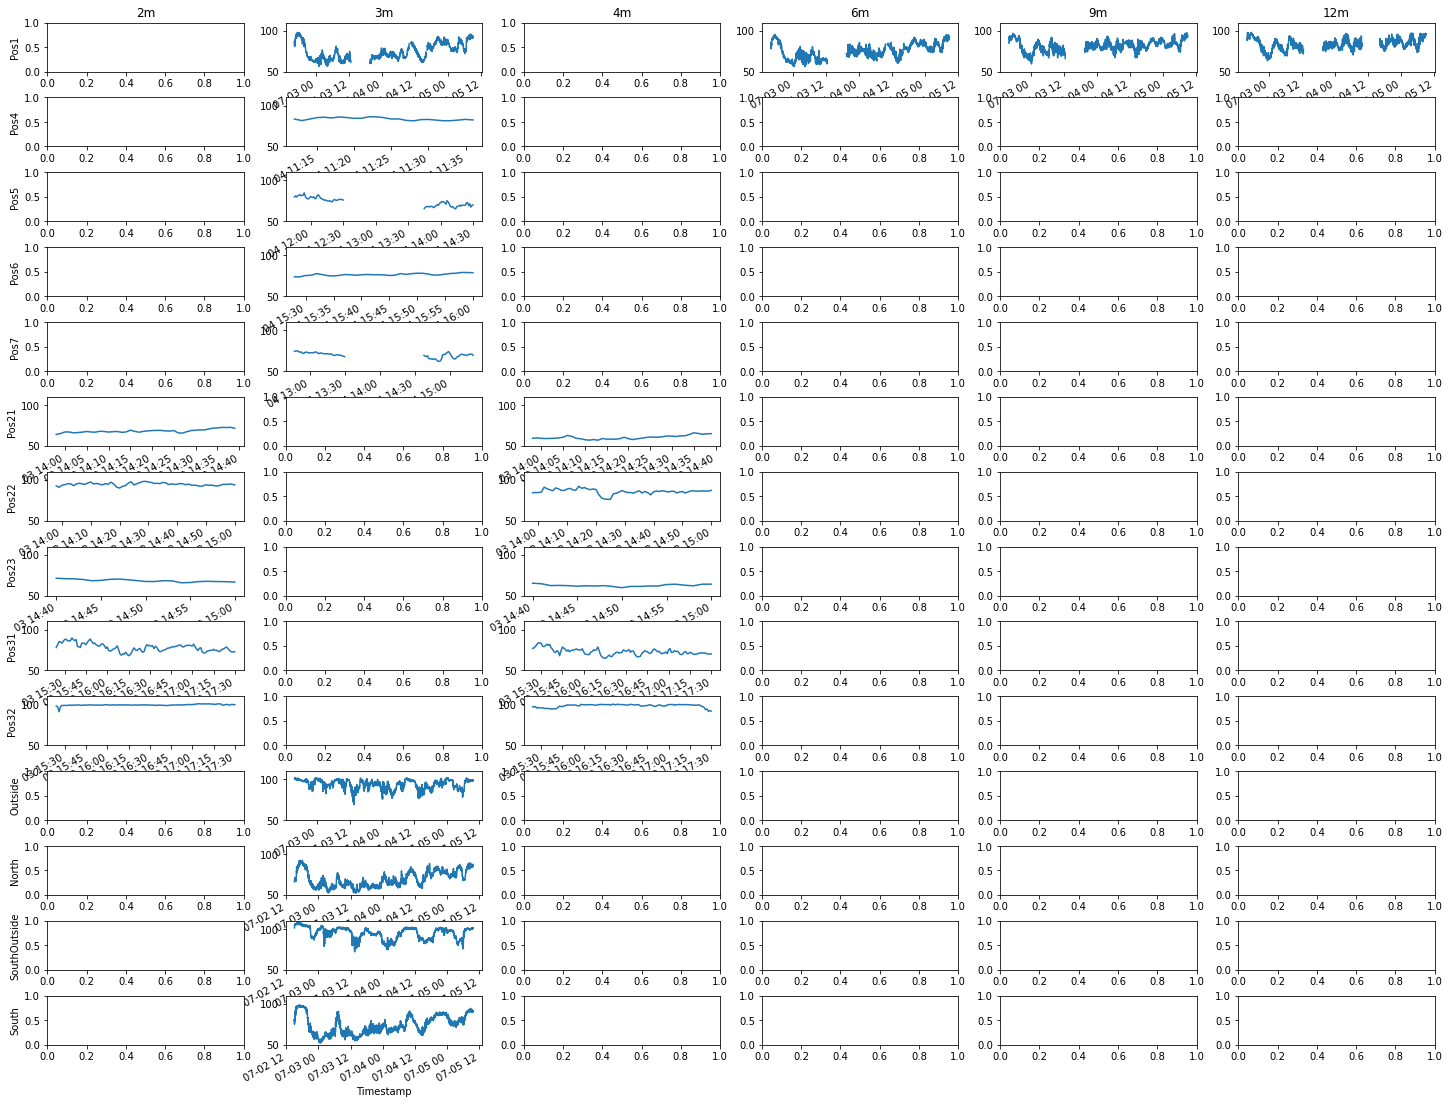

In [12]:
DOcolumns = [col for col in df.columns if 'DO' in col]
positions = []
depths = [2, 3, 4, 6, 9, 12]

fig, axes = plt.subplots(14,len(depths), figsize=(20,18))
fig.tight_layout()

for key, col in enumerate(DOcolumns):
    depth = int(re.search('m\d+', col).group()[1:])  # Get sensor depth
    pos = col[0:re.search('m\d+', col).start()]      # Get sensor position

    if pos not in positions:   # Slow, switch to dict later maybe
        positions.append(pos)

    df.loc[:,col].plot(ax=axes[positions.index(pos), depths.index(depth)], ylim=(50, 110))


for key, ax in enumerate(axes[0]):
    ax.set_title(str(depths[key]) + 'm')
    #plt.xticks(rotation=45)
    
for key, ax in enumerate(axes[:,0]):
    ax.set_ylabel(positions[key])
    ax.xaxis.label.set_visible(False)

array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>],
      dtype=object)

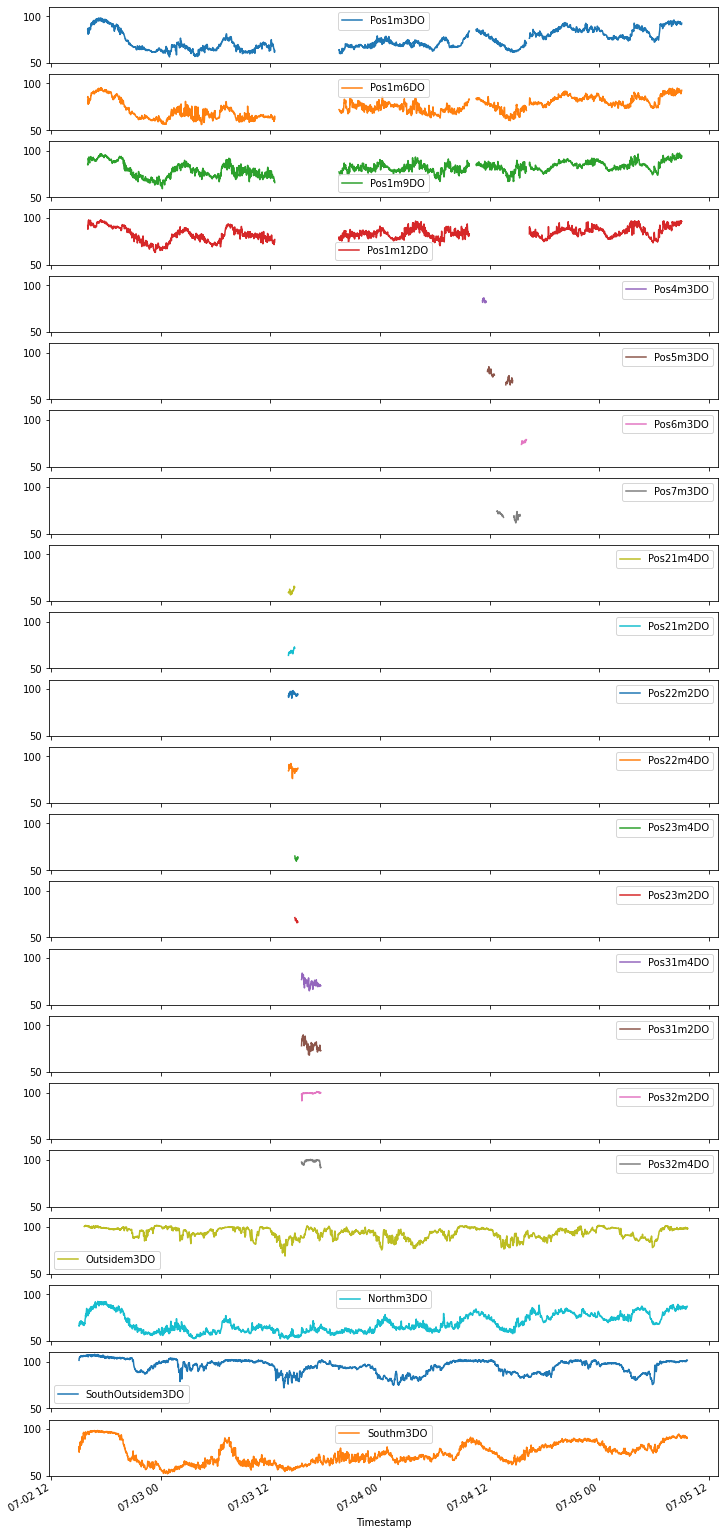

In [109]:
df.loc[:,DOcolumns].plot(subplots=True, figsize=(12,30), ylim=(50, 110))

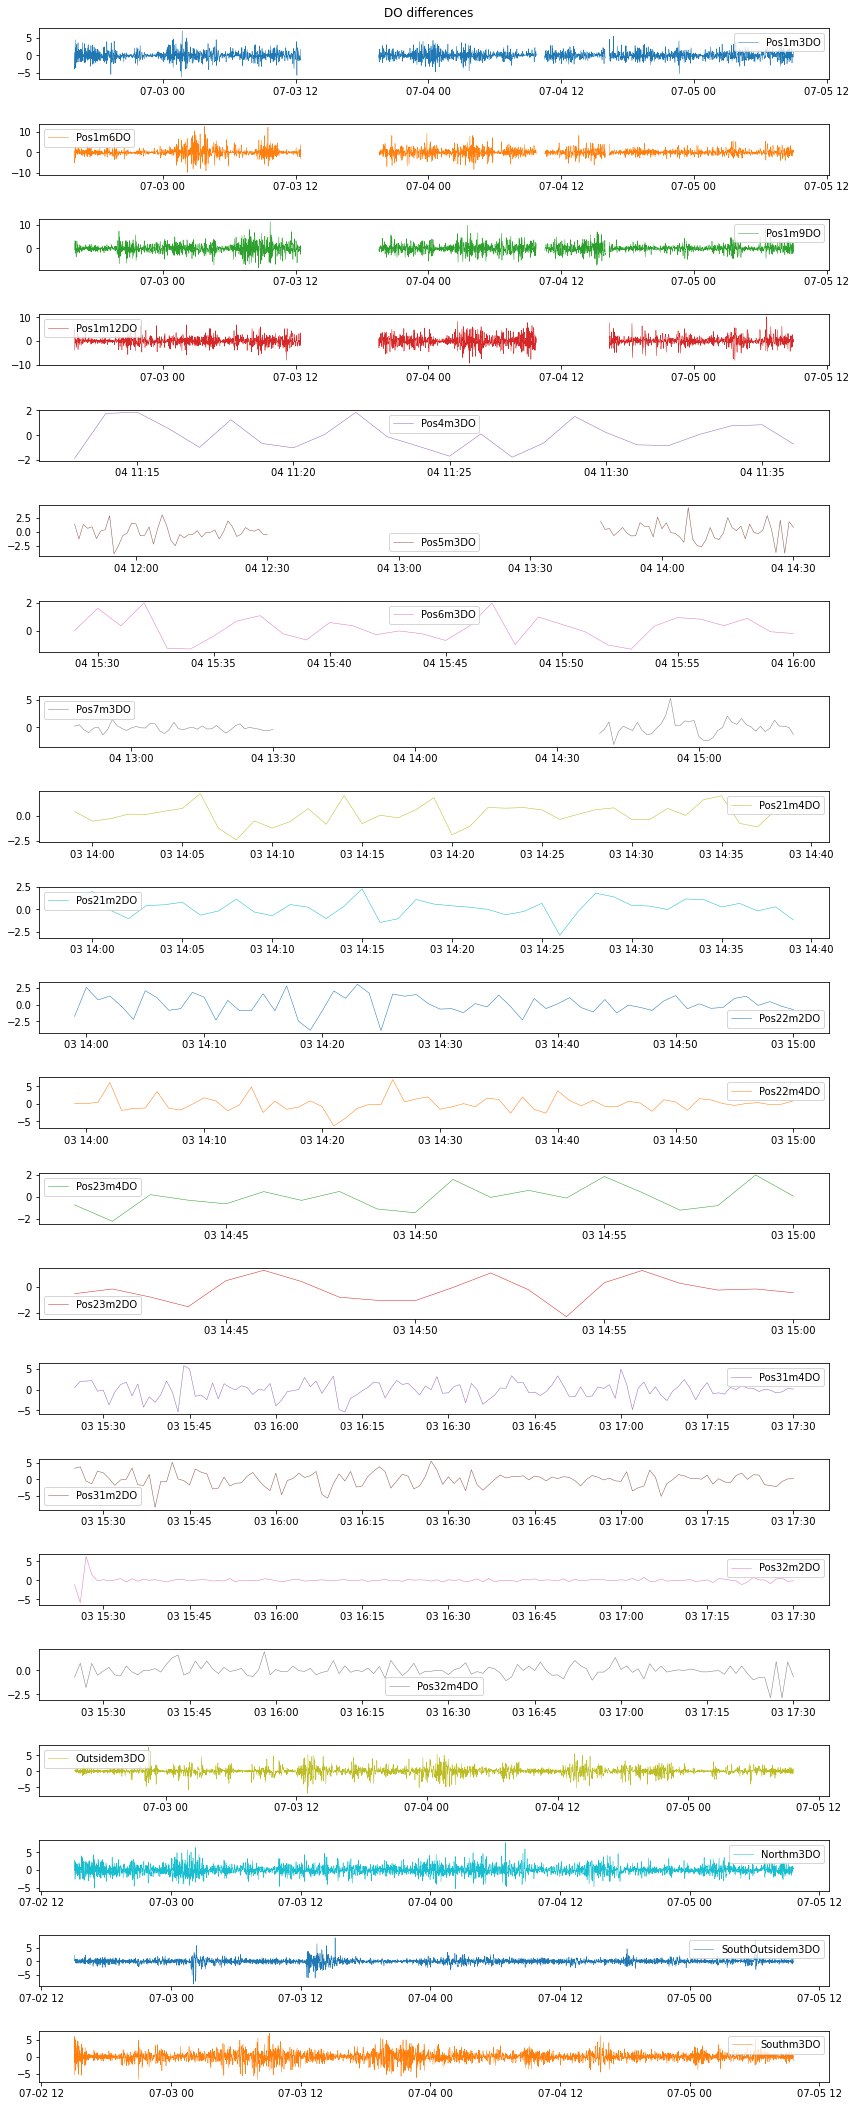

In [27]:
ax = df.loc[:,DOcolumns].diff().plot(subplots=True, figsize=(12,30), linewidth=0.5, sharex=False)
#plt.tight_layout()
#plt.xaxis.label.set_visible(False)
plt.suptitle('DO differences')
plt.tight_layout()
plt.subplots_adjust(top=0.97)
for axis in ax:
    axis.xaxis.label.set_visible(False)

C:\Users\moesk\anaconda3\envs\oxygenModel\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


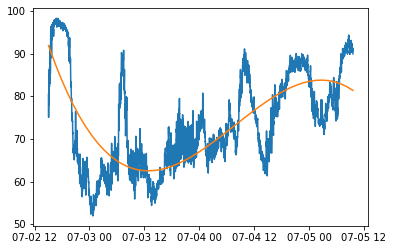

In [112]:
x = mdates.date2num(df.index[df['Southm3DO'].isna() == 0])
coeff = np.polyfit(x,df['Southm3DO'].dropna(), 16)
poly = np.poly1d(coeff)
new_x = np.linspace(x[0], x[-1])
new_y = poly(new_x)

plt.plot(df.index[df['Southm3DO'].isna() == 0], df['Southm3DO'].dropna(), new_x, new_y)

## Scatter Matrix (Position 1)

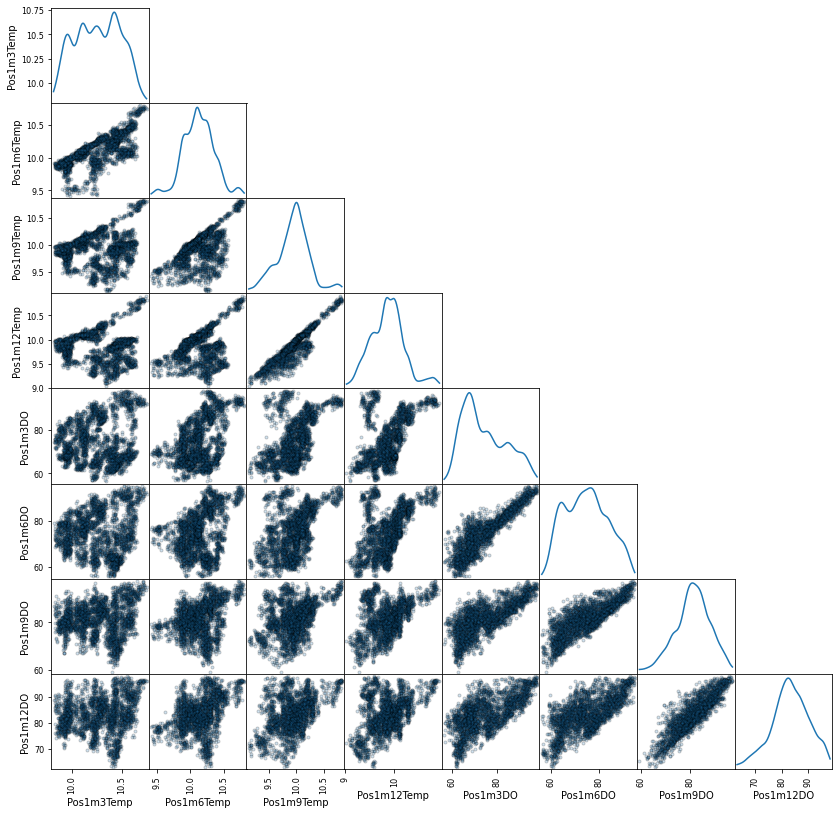

In [173]:
ax = pd.plotting.scatter_matrix(df.loc[:,tempColumns[:4] + DOcolumns[:4]], figsize=(14,14), alpha= 0.20, diagonal='kde', color = 'tab:blue', edgecolors = 'black')
for i in range(np.shape(ax)[0]):
    for j in range(np.shape(ax)[1]):
        if i < j:
            ax[i,j].set_visible(False)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

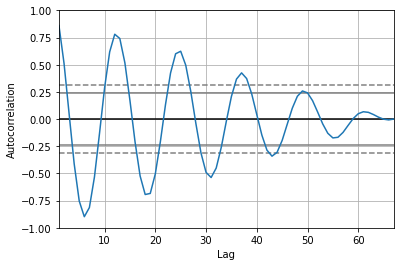

In [202]:
pd.plotting.autocorrelation_plot(df["TideLevel"].dropna().resample("H").mean())

<AxesSubplot:xlabel='Timestamp'>

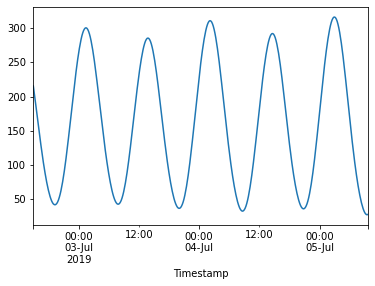

In [192]:
df['TideLevel'].dropna().plot()

## DO autocorrelation

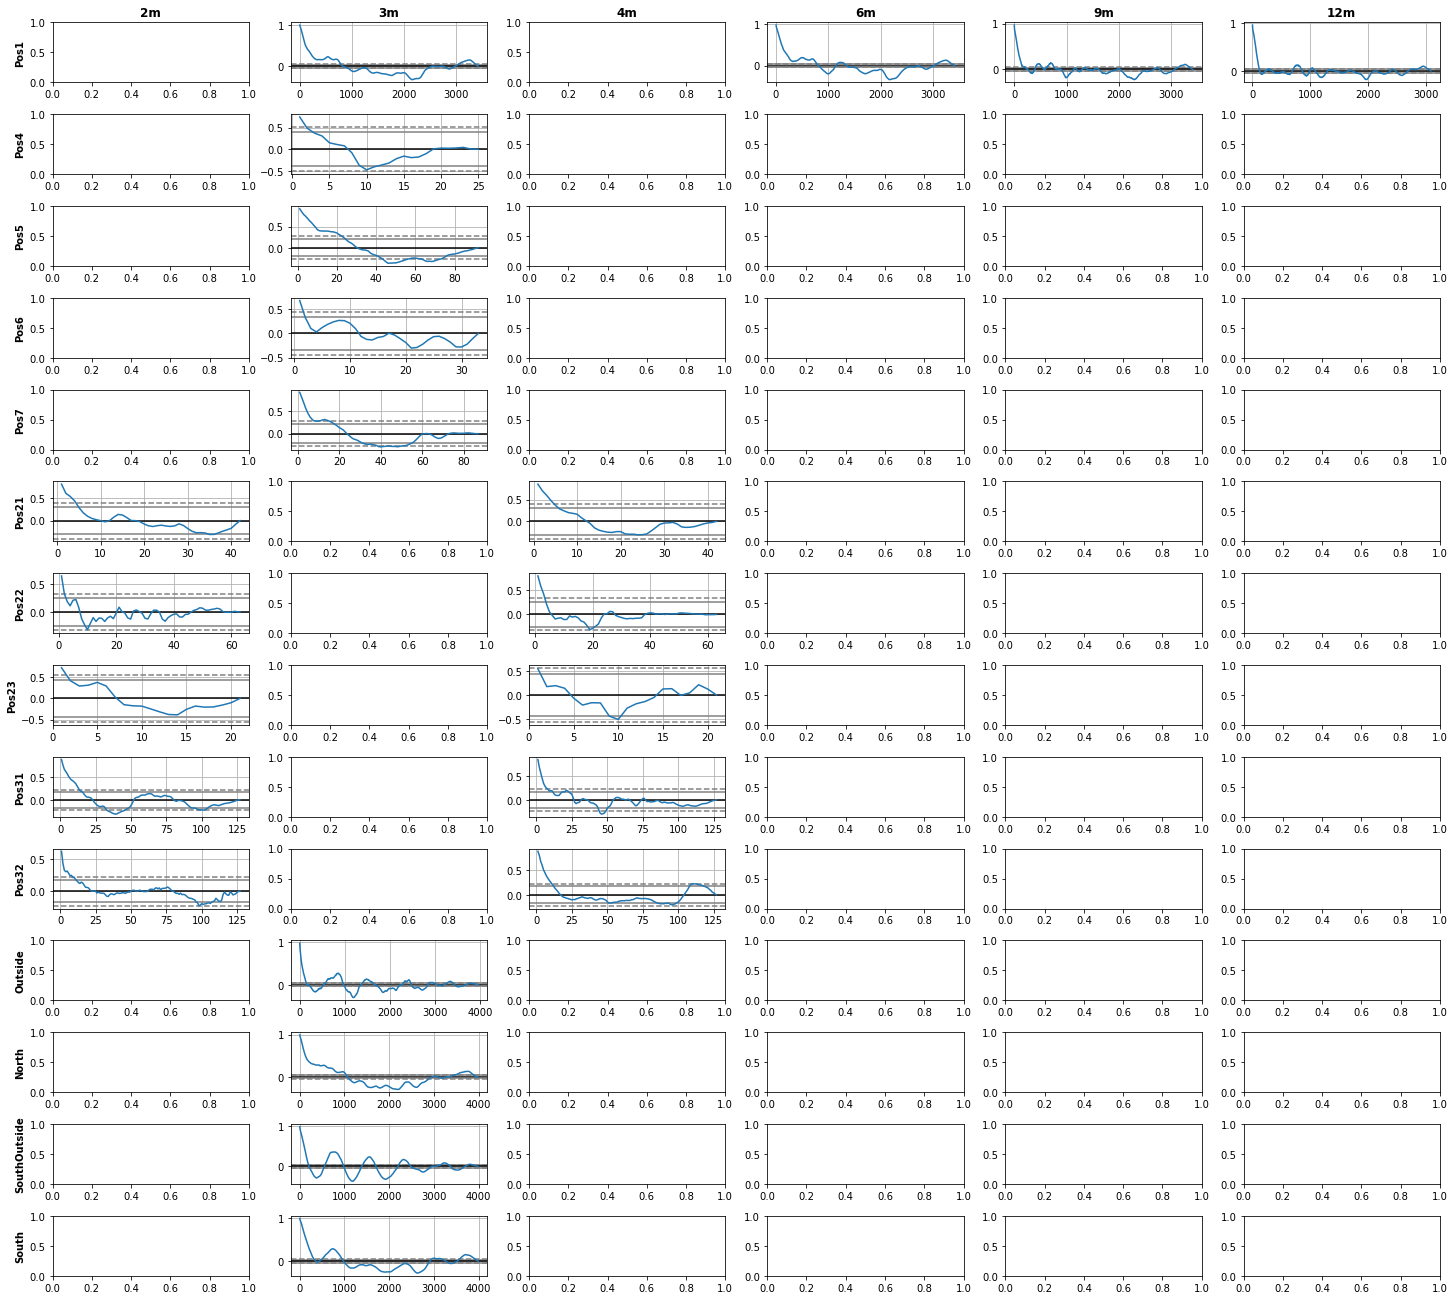

In [221]:
#pd.plotting.autocorrelation_plot(df.loc[:,DOcolumns].dropna())

fig, axes = plt.subplots(14,len(depths), figsize=(20,18))
fig.tight_layout()

for key, col in enumerate(DOcolumns):
    depth = int(re.search('m\d+', col).group()[1:])  # Get sensor depth
    pos = col[0:re.search('m\d+', col).start()]      # Get sensor position

    if pos not in positions:   # Slow, switch to dict later maybe
        positions.append(pos)
    
    ax = pd.plotting.autocorrelation_plot(df.loc[:,col].dropna(), ax=axes[positions.index(pos), depths.index(depth)])
    ax.set_ylabel('')
    ax.set_xlabel('')
    #df.loc[:,col].plot(ax=axes[positions.index(pos), depths.index(depth)], ylim=(50, 110))


for key, ax in enumerate(axes[0]):
    ax.set_title(str(depths[key]) + 'm', fontweight="bold")
    ax.xaxis.label.set_visible(False)
    #plt.xticks(rotation=45)
    
for key, ax in enumerate(axes[:,0]):
    ax.set_ylabel(positions[key], fontweight="bold")
    ax.xaxis.label.set_visible(False)

## Temperature autocorrelation

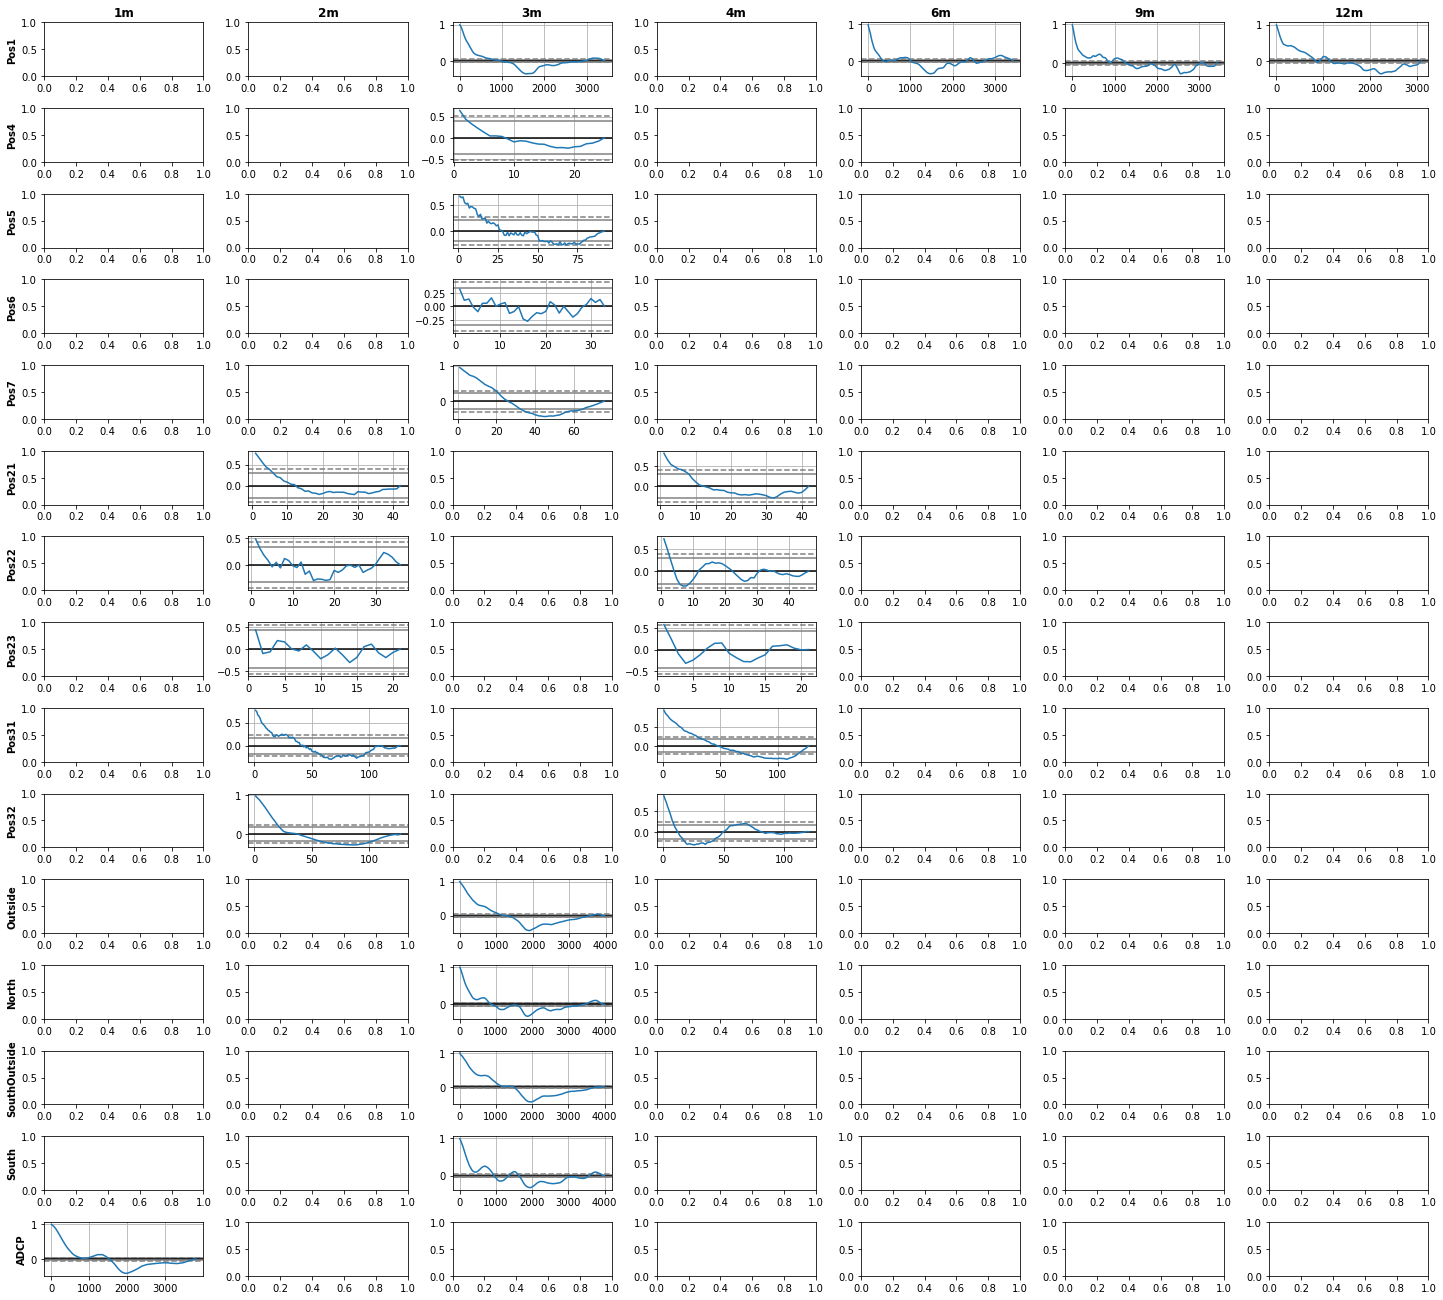

In [230]:
depths = [1, 2, 3, 4, 6, 9, 12]
fig, axes = plt.subplots(15,len(depths), figsize=(20,18))
fig.tight_layout()

for key, col in enumerate(tempColumns):
    depth = int(re.search('m\d+', col).group()[1:])  # Get sensor depth
    pos = col[0:re.search('m\d+', col).start()]      # Get sensor position

    if pos not in positions:   # Slow, switch to dict later maybe
        positions.append(pos)
    
    ax = pd.plotting.autocorrelation_plot(df.loc[:,col].dropna(), ax=axes[positions.index(pos), depths.index(depth)])
    ax.set_ylabel('')
    ax.set_xlabel('')
    #df.loc[:,col].plot(ax=axes[positions.index(pos), depths.index(depth)], ylim=(50, 110))


for key, ax in enumerate(axes[0]):
    ax.set_title(str(depths[key]) + 'm', fontweight="bold")
    ax.xaxis.label.set_visible(False)
    #plt.xticks(rotation=45)
    
for key, ax in enumerate(axes[:,0]):
    ax.set_ylabel(positions[key], fontweight="bold")
    ax.xaxis.label.set_visible(False)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

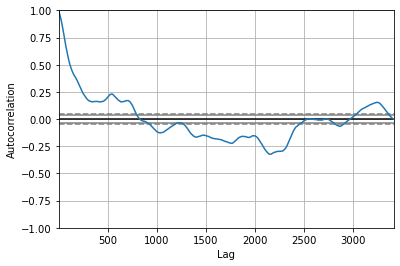

In [213]:
pd.plotting.autocorrelation_plot(df['Pos1m3DO'].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

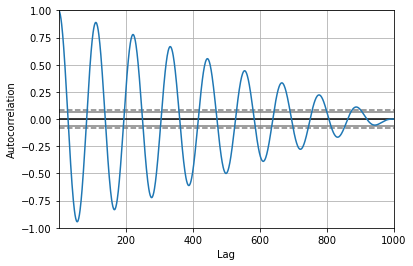